In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def create_model():
    model = {
        'dense1': tf.keras.layers.Dense(10, activation='tanh'),
        'dense2': tf.keras.layers.Dense(10, activation='tanh'),
        'output': tf.keras.layers.Dense(1)
    }
    return model


In [11]:
def call_model(model, x):
    x = model['dense1'](x)
    x = model['dense2'](x)
    x = model['output'](x)
    return x

In [12]:
k = 0.223 #decay constant according to the graph

def pde(x,model):
    with tf.GradientTape() as tape:
        tape.watch(x)
        y = call_model(model, x)
    dy_dx = tape.gradient(y, x)
    return dy_dx + k * y



In [13]:
def loss(model, x_f, x0, y0):
    # PDE loss
    f = pde(x_f, model)
    mse_pde = tf.reduce_mean(tf.square(f))
    
    # Initial condition loss
    y0_pred = call_model(model, x0)
    mse_ic = tf.reduce_mean(tf.square(y0 - y0_pred))
    
    return mse_pde + mse_ic

In [14]:
model = create_model()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
N_f = 200
x_f = tf.linspace(0.0,10.0,N_f)
x_f = tf.reshape(x_f, (-1,1))
x0 = tf.constant([[0.0]])
y0 = tf.constant([[1.0]])


In [15]:
epochs = 1000
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        total_loss = loss(model, x_f, x0, y0)
    gradients = tape.gradient(total_loss, [var for layer in model.values() for var in layer.trainable_variables])
    optimizer.apply_gradients(zip(gradients, [var for layer in model.values() for var in layer.trainable_variables]))
    if epoch % 500 == 0:
        print(f'Epoch {epoch}, Loss: {total_loss.numpy()}')
        

Epoch 0, Loss: 1.0191770792007446
Epoch 500, Loss: 0.00017881031089928


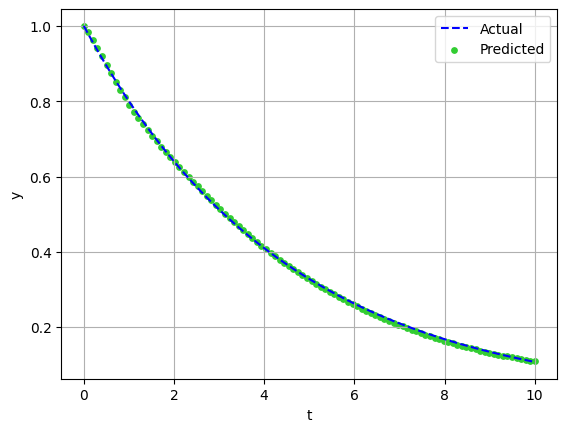

In [ ]:
# Test Data
x_test = np.linspace(0, 10, 100).reshape(-1, 1).astype(np.float32)
y_pred = call_model(model, x_test).numpy()

# Viz
y_true = np.exp(-k * x_test)

plt.plot(x_test, y_true, 'b--', label='Actual')
plt.scatter(x_test, y_pred, color='limegreen', s=15, label='Predicted')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
